<a href="https://colab.research.google.com/github/Allekarthik/AIML_Projects_and_labs/blob/main/AIML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:



! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=b0bf127875bc0585c526aa82e27c67d44bcda8f197c90399c9d10d1390316461
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


try with different languages.

let us try with english and italian

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('it')

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [3]:
it2

'The Elephant Man è un film biografico del 1980 diretto da David Lynch.\nIl film è stato adattato dai libri The Elephant Man and Other Reminiscences del dottor Frederick Treves e The Elephant Man: A Study in Human Dignity di Ashley Montagu. Ben accolta all\'epoca della distribuzione, la pellicola consacrò i protagonisti Anthony Hopkins, John Hurt, Hannah Gordon e altri membri del cast.\n\nNella Londra di fine Ottocento, il deforme John Merrick viene scoperto da un medico di buon cuore, il dottor Frederick Treves, durante uno spettacolo di strada gestito dall\'avido e malvagio signor Bytes. Merrick presenta numerose deformazioni in gran parte del corpo, soprattutto nel capo, per via della sua sindrome di Proteo, tanto da venire soprannominato l\'Uomo Elefante; per non essere deriso quando cammina in mezzo alla gente comune, Merrick indossa in testa un sacco bucato cucito ad un cappello, in modo tale da coprire le deformità del viso e del cranio. Bytes si ritiene il proprietario di Merri

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
it1 = cleanup(it1)
it2 = cleanup(it2)

In [6]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

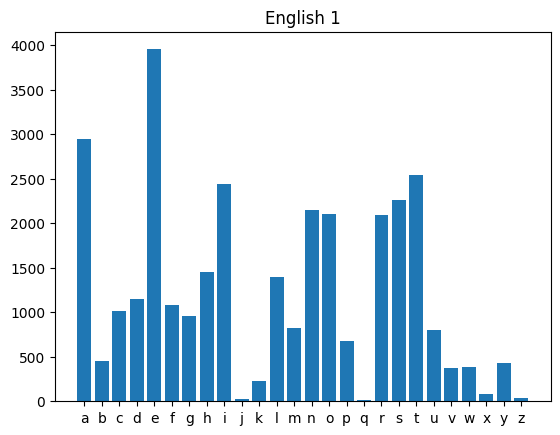

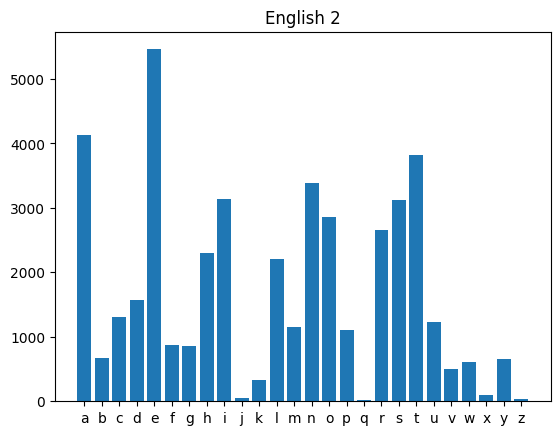

In [7]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

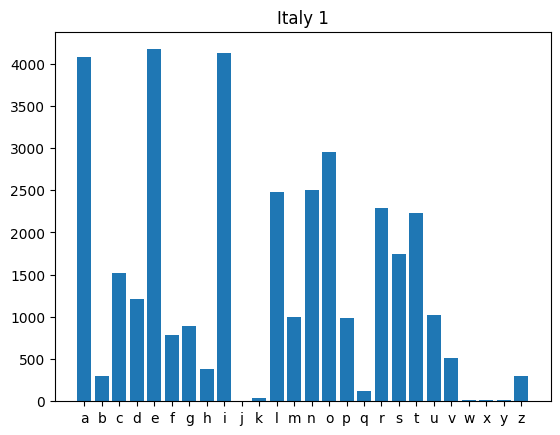

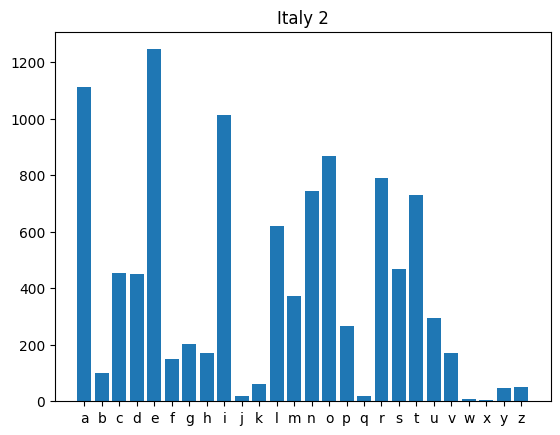

In [8]:
unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Italy 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Italy 2')
plt.show()

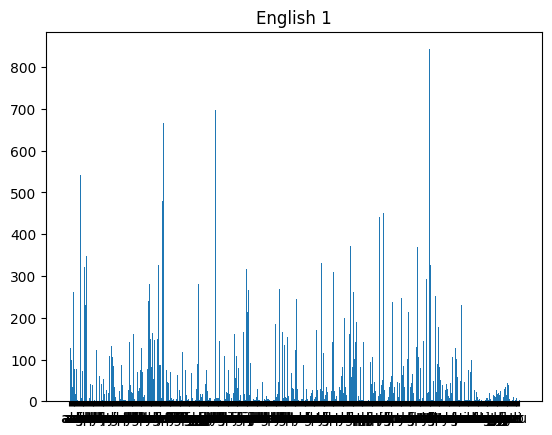

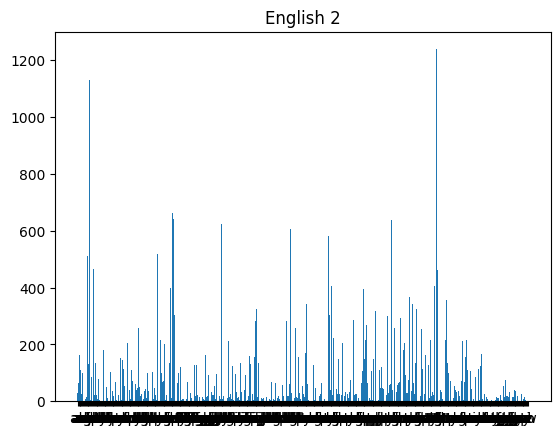

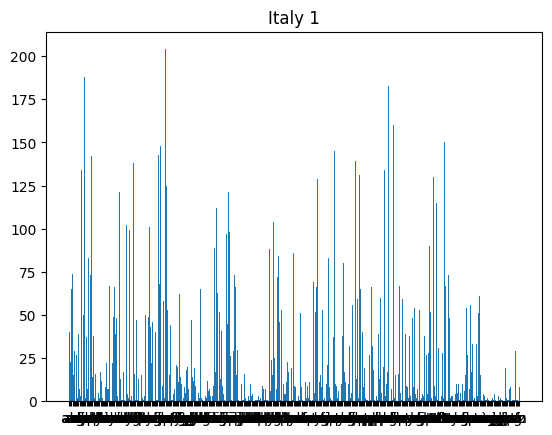

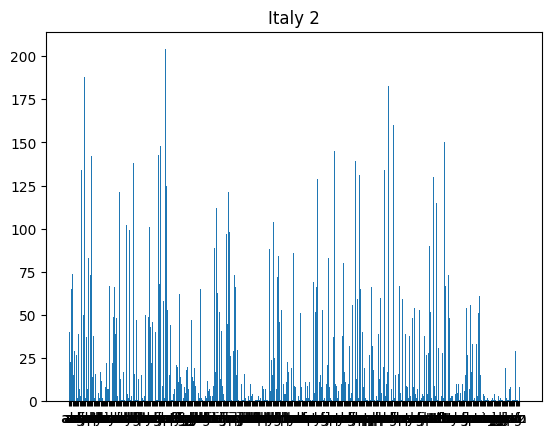

In [9]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_it1 = Counter(ngrams(it2,2))
plothistogram(bigram_it1)
plt.title('Italy 1')
plt.show()

bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Italy 2')
plt.show()

In [10]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

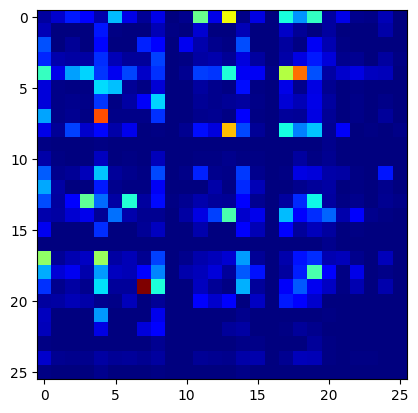

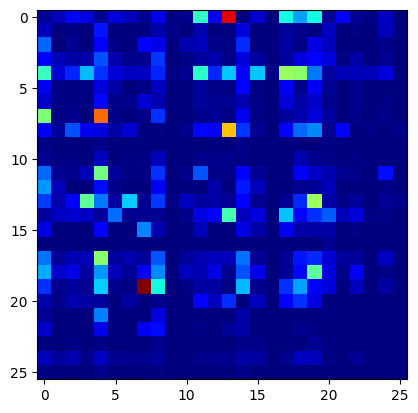

In [11]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

In [12]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

q)  The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

let us see what happens if we use diff topics here iam taking python and java as topics

In [13]:
topic1 = 'Python (programming language'
topic2 = 'Java (programming language'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('it')

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [14]:
it2

'In informatica Java è un linguaggio di programmazione ad alto livello, orientato agli oggetti e a tipizzazione statica, che si appoggia sull\'omonima piattaforma software di esecuzione, specificamente progettato per essere il più possibile indipendente dalla piattaforma hardware di esecuzione (tramite compilazione in bytecode prima e interpretazione poi da parte di una JVM) (sebbene questa caratteristica comporti prestazioni in termini di computazione inferiori a quelle di linguaggi direttamente compilati come C e C++ ovvero dunque perfettamente adattati alla piattaforma hardware).\n\nJava è stato creato a partire da ricerche effettuate alla Stanford University agli inizi degli anni novanta. Nel 1992 nasce il linguaggio Oak (in italiano \'quercia\'), prodotto da Sun Microsystems e realizzato da un gruppo di esperti sviluppatori capitanati da James Gosling. Questo nome fu successivamente cambiato in Java (una varietà di caffè indonesiana; il logo adottato è una tazzina per tale bevanda

In [15]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [16]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
it1 = cleanup(it1)
it2 = cleanup(it2)

In [17]:
print(eng1)

pythonisahighlevelgeneralpurposeprogramminglanguageitsdesignphilosophyemphasizescodereadabilitywiththeuseofsignificantindentationpythonisdynamicallytypedandgarbagecollecteditsupportsmultipleprogrammingparadigmsincludingstructuredparticularlyproceduralobjectorientedandfunctionalprogrammingitisoftendescribedasabatteriesincludedlanguageduetoitscomprehensivestandardlibraryguidovanrossumbeganworkingonpythoninthelatesasasuccessortotheabcprogramminglanguageandfirstreleaseditinaspythonpythonwasreleasedinpythonreleasedinwasamajorrevisionnotcompletelybackwardcompatiblewithearlierversionspythonreleasedinwasthelastreleaseofpythonpythonconsistentlyranksasoneofthemostpopularprogramminglanguagesandhasgainedwidespreaduseinthemachinelearningcommunityhistorypythonwasinventedinthelatesbyguidovanrossumatcentrumwiskundeinformaticacwiinthenetherlandsasasuccessortotheabcprogramminglanguagewhichwasinspiredbysetlcapableofexceptionhandlingandinterfacingwiththeamoebaoperatingsystemitsimplementationbeganindecembe

In [18]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

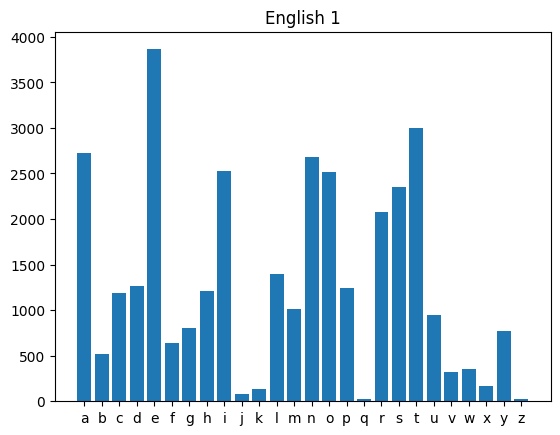

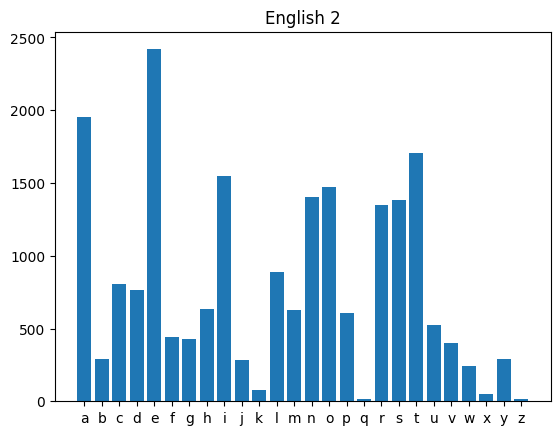

In [19]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

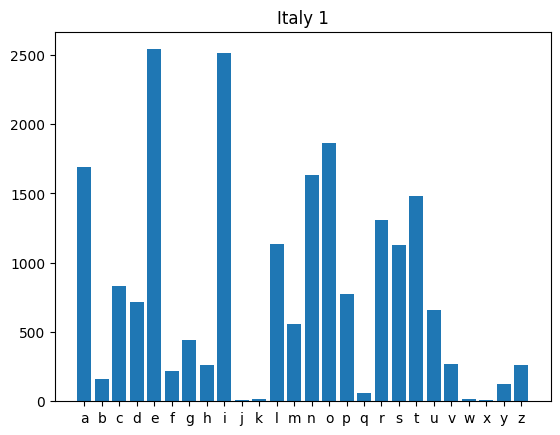

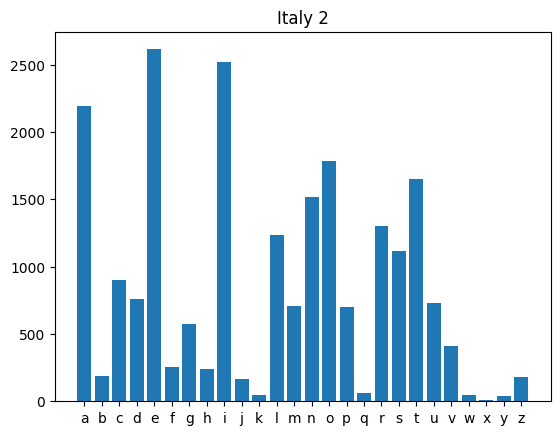

In [20]:
unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Italy 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Italy 2')
plt.show()

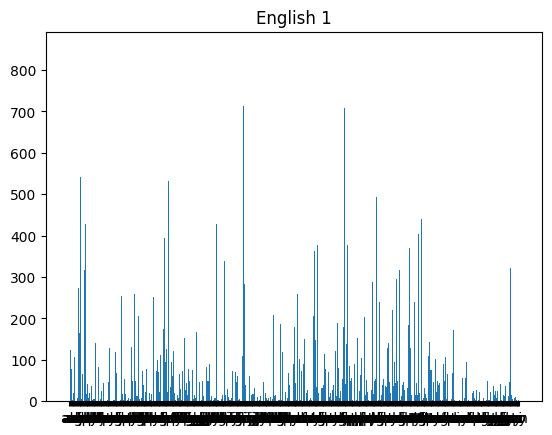

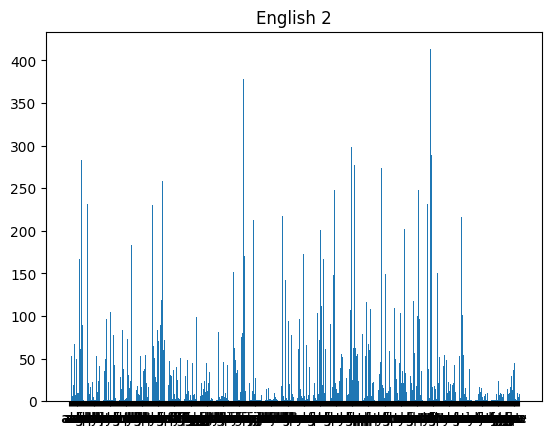

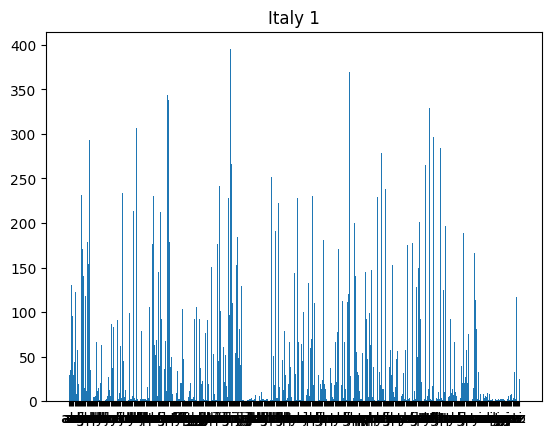

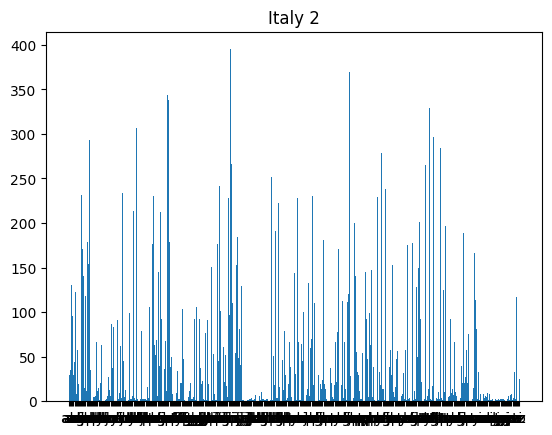

In [21]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_it1 = Counter(ngrams(it2,2))
plothistogram(bigram_it1)
plt.title('Italy 1')
plt.show()

bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Italy 2')
plt.show()

In [23]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

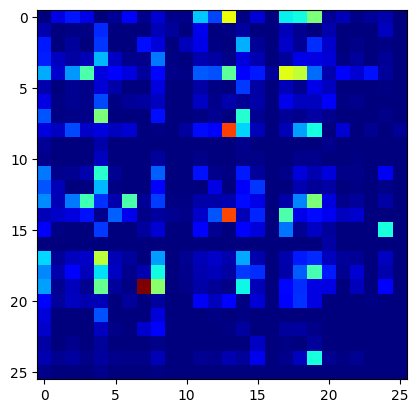

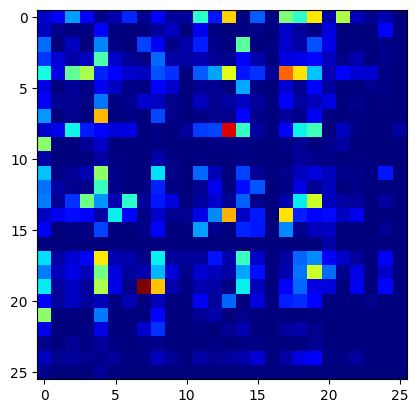

In [24]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

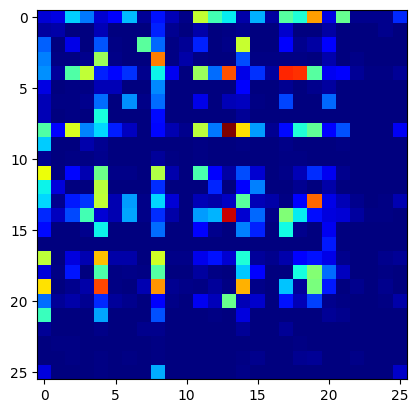

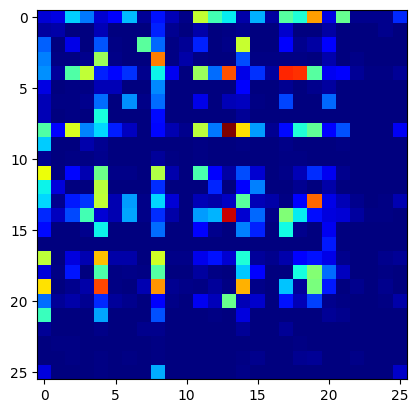

In [25]:
bifr1 = plotbihistogram(bigram_it1)
plt.show()
bifr2 = plotbihistogram(bigram_it2)

In [26]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

here we can see that some  difference in biograms for different topics



 What if we use text from another source than Wikipedia?

Using text from sources other than Wikipedia can provide diverse datasets for analysis. Some alternative sources include Project Gutenberg for classic literature, ArXiv for research papers, Common Crawl for web data, Google Books API for books, News API for news articles, and PubMed for biomedical literature. Each source requires specific methods for retrieval and processing of text data.

How can we use and visualize trigrams and higher n-grams?

by Tokenization and N-gram Generation
Counting N-grams
Visualization(bar chart,heatmap,network graph) etc


Which is the best combination of features?

hole and sum

How would you test or visualize four or more features?

ANOVA (Analysis of Variance) or MANOVA (Multivariate Analysis of Variance)
earson correlation, Spearman correlation) between pairs of features to understand their relationships

Can you come up with your own features? NO

Will these features work for different classes other than 0 and 1?


Yes, the strategies and techniques mentioned can work effectively for datasets with classes other than binary classes (0 and 1).

What will happen if we take more that two classes at a time?

it may increase complexity,class imbalance,different evaluation metrics